In [2]:
import scqubits as scq 

In [2]:
scq.GUI()

Output(layout=Layout(width='100%'))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='n', ylabel='Re $\\psi_j(n)$'>)

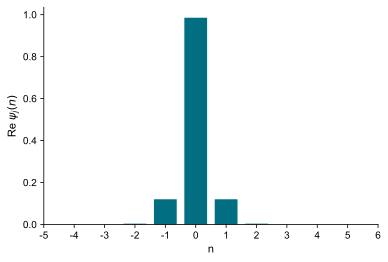

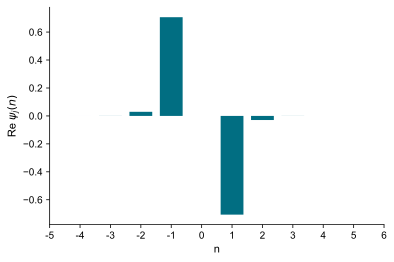

In [3]:
#n-basis wavefunctions
transmon = scq.Transmon(EJ=1,
                              EC=1,
                              ng=0,
                              ncut=101)

transmon.numberbasis_wavefunction(esys=None, which=0)
transmon.numberbasis_wavefunction(esys=None, which=1)


transmon.plot_n_wavefunction(esys=None, mode='real', which=0, nrange=None)
transmon.plot_n_wavefunction(esys=None, mode='real', which=1, nrange=None)


In [3]:
#2D PLOTS
#allows you to generate plots which sweep EJ and EC and plot T1 and Tphi as a function of these Hamiltonian Parameters

#define the qubit - except for the parameters you change, these will stay constant throughout
transmon = scq.Transmon(EJ=10,EC=0.1,ng=0,ncut=101)

import numpy as np
import matplotlib.pyplot as plt

EJ = np.linspace(3,15,50) #EJ range
EC = np.linspace(0.1,5,50) #EC range


phi_matrix_element = []
n_matrix_element = []

T2_2D = []
T1_2D = []
Tphi_2D = []
n_matrix_2D = []
phi_matrix_2D = []


for i in range(len(EJ)):
    transmon.EJ = EJ[i]
    
    #clear these each time
    T1 = [] 
    T2 = [] 
    Tphi = []
    phi_matrix_element = []
    n_matrix_element = []
    
    for j in range(len(EC)):
        transmon.EC = EC[j]
     
        T1.append(transmon.t1_effective(noise_channels=None)/1000) #this is in nanoseconds, so 1000 converts to microseconds
        T2.append(transmon.t2_effective(noise_channels=None)/1000)
        Tphi.append(transmon.t2_effective(noise_channels=["tphi_1_over_f_cc","tphi_1_over_f_ng"])/1000)

    T2_2D.append(T2)
    T1_2D.append(T1)
    Tphi_2D.append(Tphi)



See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1195

In [8]:
transmon.supported_noise_channels()

['tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_charge_impedance']

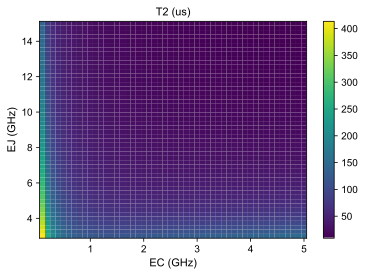

In [15]:
#plotting T2 (T2 combines T1 and T_phi)
plt.figure
plt.pcolormesh(EC, EJ, T2_2D)
plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T2 (us)")
plt.colorbar(orientation='vertical')

Text(0.5, 0.92, 'T1 rate (us)')

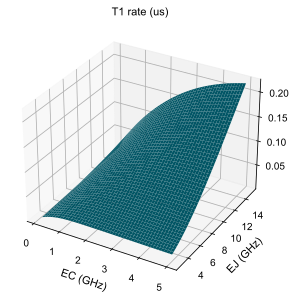

In [15]:
#plotting T1
'''
plt.figure
plt.pcolormesh(EC, EJ, T1_2D)
plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T1 (us)")
plt.colorbar(orientation='vertical')
'''

fig = plt.figure()
ax = plt.axes(projection='3d')
ECg, EJg = np.meshgrid(np.array(EC), np.array(EJ))
ax.plot_surface(ECg, EJg, 1. /np.array(T1_2D))
plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T1 rate (us)")

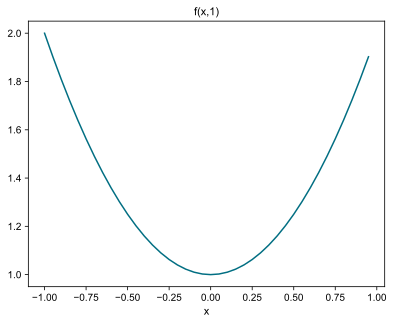

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1.,1.,0.05)
y = np.arange(-1.,1.,0.05)

'''
fig = plt.figure()
ax = plt.axes(projection='3d')
xg,yg = np.meshgrid(x, y)
ax.plot_surface(xg,yg, xg*xg+yg*yg)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x,y)")
fig.savefig('example_gd.png', bbox_inches='tight')
'''

fig = plt.figure()
ax = plt.axes()
ax.plot(x, x*x+1*1)
plt.xlabel("x")
plt.title("f(x,1)")
fig.savefig('example_fd.png', bbox_inches='tight')


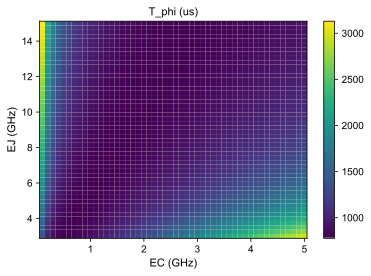

In [17]:
#plotting T_phi
plt.figure
plt.pcolormesh(EC, EJ, Tphi_2D)
plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T_phi (us)")
plt.colorbar(orientation='vertical')